In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import dedalus.public as de
from dedalus.tools.array import axslice, reshape_vector

# Diagonalization in sin/cos Bases

How to do it?

## How does interpolation work?

First, in 1-D, let's create some data on a sin/cos basis

In [2]:
x = de.SinCos('x',128)
domain = de.Domain([x,], grid_dtype='float')

In [3]:
xx = x.grid()

In [7]:
y = domain.new_field()

Let's set this to be a sin basis, and give it some initial data.

In [12]:
y.meta['x']['parity'] = -1
y['g'] = np.sin(xx)

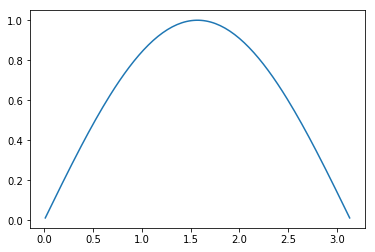

In [13]:
plt.plot(xx, y['g'])

Now, we'll interpolate it to its value at x = 1.0:

In [17]:
f = y.interpolate(x=1.0)

/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:976: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  start = pdata[axslice(axis, 0, N-1)]
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:977: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  shift = pdata[axslice(axis, 1, N)]
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:979: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np

Let's plot this.

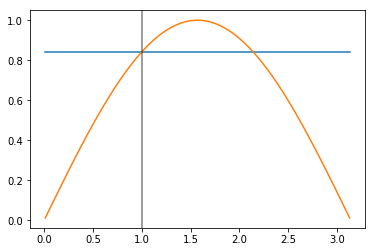

In [26]:
plt.plot(xx,f['g'])
plt.plot(xx,y['g'])
plt.axvline(1.0,color='k',alpha=0.5)

Note that dedalus sets the interpolated quantity to be constant, but of the same dimension as the original:

In [27]:
f.meta['x']['constant']

True

In [68]:
f['g'].shape == y['g'].shape

/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:987: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pdata[axslice(axis, 1, None)] *= 0.5


True

The output is also of cos parity:

In [31]:
f.meta['x']['parity']

1

The coefficient array is what you would expect: the interpolated value is stored as the first coefficient in the array; all others are zero. This is why fields resulting from interpolation must be cos: sin bases have no zero component.

In [32]:
f['c']

array([0.84147098, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 2D examples

Now that we have the basics of 1D interpolation down, let's look at 2D examples.

We'll use Fourier bases here so we can examine what 'left' does in Keaton's code.

In [49]:
p = de.Fourier('p', 128)
q = de.Fourier('q', 128)

d = de.Domain([p,q], grid_dtype='float')

u = d.new_field()
v = d.new_field()

pp,qq =d.grids()

u['g'] = np.sin(pp)*np.cos(3*qq)

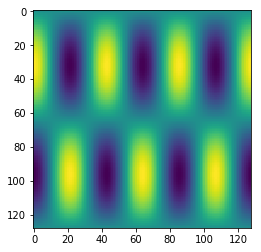

In [50]:
plt.imshow(u['g'])

We want to interpolate to the left boundary of the `q` dimension, and store this in the `v` field.

In [62]:
q.Interpolate(u,'left',out=v).evaluate()

/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:679: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(cdata_out[posfreq], cdata_in[posfreq])
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:680: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(cdata_out[badfreq], 0)
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:681: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

<Field 138656090654536>

It does what we expect: the data returned is variable in `p` but constant in `q`.

/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:679: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(cdata_out[posfreq], cdata_in[posfreq])
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:680: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(cdata_out[badfreq], 0)
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:681: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

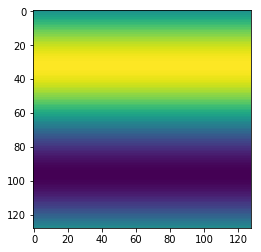

In [63]:
plt.imshow(v['g'])

In [69]:
print("v: constant (p, q) = ({}, {})".format(v.meta['p']['constant'], v.meta['q']['constant']))

v: constant (p, q) = (False, True)


/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:660: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(cdata_out[posfreq], cdata_in[posfreq])
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:661: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(cdata_out[badfreq], 0)
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:679: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

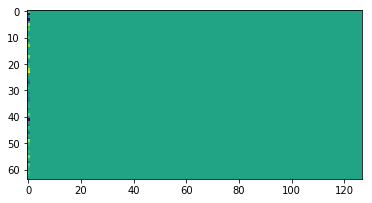

In [64]:
plt.imshow(v['c'].real)

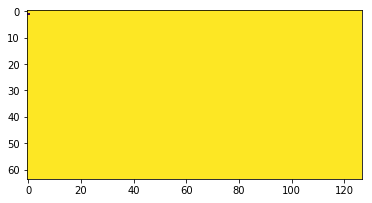

In [65]:
plt.imshow(v['c'].imag)

In [67]:
v['c'][1,:].real

array([-4.46691295e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

Now, let's try this with sin/cos bases.

In [4]:
x1 = de.SinCos('x1',128)
domain_2d = de.Domain([x,x1],grid_dtype='float')

y2 = domain_2d.new_field()

xx2, xx12 = domain_2d.grids()

y2['g'] = np.sin(xx2)*np.sin(2*xx12)

In [5]:
y2.meta['x1']['parity'] = -1
y2.meta['x']['parity'] = -1

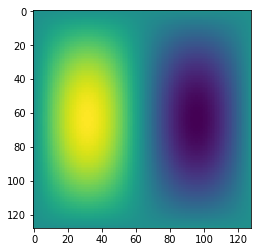

In [6]:
plt.imshow(y2['g'])

In [35]:
out = domain_2d.new_field()
out.meta['x']['parity'] = -1
out.meta['x1']['parity'] = -1

In order to find the value along the diagonal, we need to interpolate in both `x` and `x1` simultaneously. Unfortunately, this is a global operation, but I don't know a way around that (yet?). 

In [7]:
def diag_interp(field, x):
    # assumes domain is square with same bases!
    k = field.domain.bases[0].elements
    phi = np.sin(k*x)
    phi = np.outer(phi,phi)
    return np.einsum('ij, ij', field['c'], phi)

Using that, we can mock up in function form the action of the `Diagonal` operator, using the same broadcast and mask technique Keaton used to do the Fourier one.

In [87]:
def Diag(field, output):
    domain = field.domain
    basis0 = domain.get_basis_object('x')
    basis1 = domain.get_basis_object('x1')
    axis0 = domain.bases.index(basis0)
    axis1 = domain.bases.index(basis1)
    slices = domain.dist.coeff_layout.slices(domain.dealias)
    k0 = reshape_vector(basis0.wavenumbers[slices[axis0]], dim=domain.dim, axis=axis0)
    k1 = reshape_vector(basis1.wavenumbers[slices[axis1]], dim=domain.dim, axis=axis1)
    filter_mask = (k0 == k1)
    di = []
    for point in y2.domain.bases[0].grid():
        di.append(diag_interp(y2,point))
    di = np.array(di)
    output.meta[axis0]['parity'] = 1
    output.require_grid_space(axis=axis1)
    output.require_coeff_space(axis=axis0)
    output.require_local(axis=axis0)
    output.data[axslice(axis0,0,1)] = di
    output.data[axslice(axis0,1,None)] = 0
    output.data[axslice(axis0,None, None)] = output.data[axslice(axis0,0,1)]
    output.require_coeff_space(axis=axis1)
    output.data *= filter_mask

In [88]:
Diag(y2,out)

/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pdata[axslice(axis, 0, 1)] *= 0.5
/home/jsoishi/miniconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/jsoishi/miniconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

The output looks odd...

/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:987: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pdata[axslice(axis, 1, None)] *= 0.5


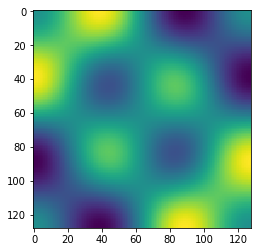

In [89]:
plt.imshow(out['g'])

But, when we test it by interpolating `left` in both bases,

In [94]:
x1_interp = out.interpolate(x1='left')
x_interp = out.interpolate(x='left')

/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pdata[axslice(axis, 0, 1)] *= 0.5
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:1162: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(output[axslice(axis, 0, 1)], interp)
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:1163: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array ind

We see both reproduce the correct values along the diagonal for the input data.

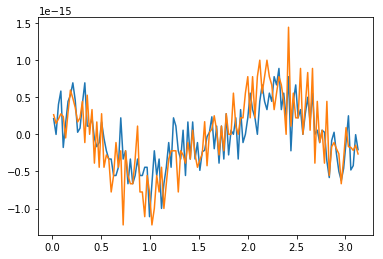

In [104]:
#plt.plot(xx,x1_interp['g'][:,0])
#plt.plot(xx,x_interp['g'][0,:])
plt.plot(xx,np.sin(xx)*np.sin(2*xx)-x_interp['g'][0,:])
plt.plot(xx,np.sin(xx)*np.sin(2*xx)-x1_interp['g'][:,0])

#plt.plot(xx,np.sin(xx)*np.sin(2*xx))

However, we have to figure out parity. As is, this produces data that is cosine in both dimensions (obvious from the output above)

In [111]:
print("out parity (x, x1) = ({}, {})".format(out.meta['x']['parity'], out.meta['x1']['parity']))
print("x_interp parity (x, x1) = ({}, {})".format(x_interp.meta['x']['parity'], x_interp.meta['x1']['parity']))
print("x1_interp parity (x, x1) = ({}, {})".format(x1_interp.meta['x']['parity'], x1_interp.meta['x1']['parity']))

out parity (x, x1) = (1, 1)
x_interp parity (x, x1) = (1, 1)
x1_interp parity (x, x1) = (1, 1)


We can see that standard interpolation along a dimension sets that dimension to cosine but leaves the other unchanged. This makes perfect sense, since an interpolated dimension becomes constant, and that must be cosine. 

In [112]:
test_interp = y2.interpolate(x=1.0)

/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:1162: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(output[axslice(axis, 0, 1)], interp)
/home/jsoishi/build/conda/dedalus/dedalus/core/basis.py:1163: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.copyto(output[axslice(axis, 1, None)], 0)


In [113]:
print("test_interp parity (x, x1) = ({}, {})".format(test_interp.meta['x']['parity'], test_interp.meta['x1']['parity']))

test_interp parity (x, x1) = (1, -1)
